In [1]:
import timeit
import random
import matplotlib.pyplot as plt

In [5]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = 0
        j = 0
        k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
    
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
    
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
        

In [6]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
        

In [18]:
input_sizes = [2, 5, 10, 15, 25, 50, 75]
merge_sort_times = []
insertion_sort_times = []

for size in input_sizes:
    arr = [random.randint(0, 1000) for _ in range(size)]

    merge_time = timeit.timeit(lambda: merge_sort(arr.copy()), number=10)
    merge_sort_times.append(merge_time)

    insert_time = timeit.timeit(lambda: insertion_sort(arr.copy()), number=10)
    insertion_sort_times.append(insert_time)
    

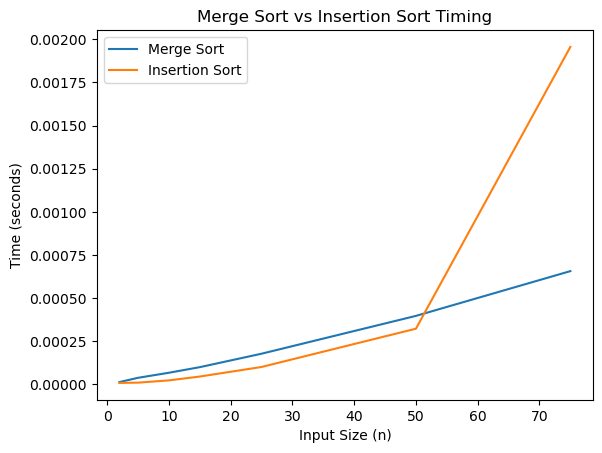

In [19]:
plt.plot(input_sizes, merge_sort_times, label='Merge Sort')
plt.plot(input_sizes, insertion_sort_times, label='Insertion Sort')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Merge Sort vs Insertion Sort Timing')
plt.legend()
plt.show()

In [20]:
def insertion_sort(arr, left, right):
    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        while j >= left and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [21]:
def hybrid_sort(arr, left, right, k):
    if right - left + 1 <= k:
        insertion_sort(arr, left, right)
    else:
        if left < right:
            mid = (left + right) // 2
            hybrid_sort(arr, left, mid, k)
            hybrid_sort(arr, mid + 1, right, k)
            merge(arr, left, mid, right)

In [24]:
def merge(arr, left, mid, right):
    L = arr[left:mid + 1]
    R = arr[mid + 1:right + 1]

    i = j = 0
    k = left

    while i < len(L) and j < len(R):
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < len(L):
        arr[k] = L[i]
        i += 1
        k += 1

    while j < len(R):
        arr[k] = R[j]
        j += 1
        k += 1

In [25]:
def time_hybrid_sort(arr, k):
    return timeit.timeit(lambda: hybrid_sort(arr.copy(), 0, len(arr) - 1, k), number=10)

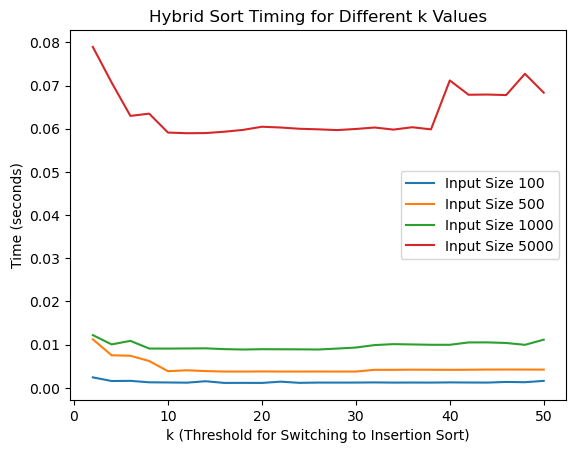

Best k for input size 100: 20
Best k for input size 500: 18
Best k for input size 1000: 18
Best k for input size 5000: 12


In [26]:
input_sizes = [100, 500, 1000, 5000]
k_values = range(2, 51, 2)
best_k_for_sizes = {}

for size in input_sizes:
    arr = [random.randint(0, 10000) for _ in range(size)]
    times = []

    for k in k_values:
        time_taken = time_hybrid_sort(arr, k)
        times.append(time_taken)

    best_k = k_values[times.index(min(times))]
    best_k_for_sizes[size] = best_k

    plt.plot(k_values, times, label=f'Input Size {size}')

plt.xlabel('k (Threshold for Switching to Insertion Sort)')
plt.ylabel('Time (seconds)')
plt.title('Hybrid Sort Timing for Different k Values')
plt.legend()
plt.show()

for size, k in best_k_for_sizes.items():
    print(f'Best k for input size {size}: {k}')